## Exploratory Data Analysis

## Table of Content

* __Step 1: Importing the Relevant Libraries and Data__
    
* __Step 2: Data Inspection and Data Cleaning__
    
* __Step 3: Null value Imputation__
    
* __Step 4: Data Analysis__

## 1. Importing libraries and data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [3]:
cabdata=pd.read_csv("Cab_Rides.csv")

## 2.  Data Inspection and Data Cleaning

In [4]:
cabdata.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


As the names of the columns are having special characters it might affect when calling some functions, so they are renamed correctly.

In [5]:
cabdata.rename(columns={"START_DATE*" : "START_DATE", "END_DATE*" : "END_DATE", "CATEGORY*"
                         : "CATEGORY", "START*" : "START", "STOP*" : "STOP", "MILES*" : "MILES",
                               "PURPOSE*" : "PURPOSE"}, inplace = True)
cabdata

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [6]:
cabdata.describe()# displays only numeric variable

,MILES
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


In [7]:
cabdata.describe(include="all") # displays the summary for both categorical and numerical variable

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
count,1155,1155,1155,1155,1155,1155.000000,653
unique,1154,1154,2,177,188,NaN,10
top,6/28/2016 23:34,6/28/2016 23:59,Business,Cary,Cary,NaN,Meeting
freq,2,2,1078,201,203,NaN,187
mean,NaN,NaN,NaN,NaN,NaN,10.566840,NaN
std,NaN,NaN,NaN,NaN,NaN,21.579106,NaN
min,NaN,NaN,NaN,NaN,NaN,0.500000,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.900000,NaN
50%,NaN,NaN,NaN,NaN,NaN,6.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,10.400000,NaN


In [8]:
cabdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


From the info we can find that there are null values in the variable "PURPOSE".

In [9]:
cabdata.dtypes # datatypes can also checked with this object

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [10]:
cabdata

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [11]:
# Can set the display size of rows and columns as below
pd.options.display.max_rows= None
pd.options.display.max_columns= 20

In [12]:
# Can check the number of samples in a variable by their category wise.
cabdata["START"].value_counts()

Cary                          201
Unknown Location              148
Morrisville                    85
Whitebridge                    68
Islamabad                      57
Durham                         37
Lahore                         36
Raleigh                        28
Kar?chi                        27
Westpark Place                 17
Apex                           17
Berkeley                       16
Midtown                        14
R?walpindi                     11
Kissimmee                      11
Kenner                         11
Emeryville                     10
New Orleans                    10
Downtown                        9
Banner Elk                      8
Colombo                         8
Edgehill Farms                  8
Central                         8
Orlando                         8
San Francisco                   8
The Drag                        7
Hazelwood                       7
Oakland                         7
Covington                       6
Preston       

As there are some categories with invalid values they are corrected as below.

In [13]:
cabdata.replace("Kar?chi", "Karachi", inplace=True)
cabdata.replace("R?walpindi", "Rawalpindi", inplace=True)

In [14]:
cabdata.isnull().sum() # Function to check the null values

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [15]:
cabdata.notnull().sum()# Function to check the non-null values

START_DATE    1155
END_DATE      1155
CATEGORY      1155
START         1155
STOP          1155
MILES         1155
PURPOSE        653
dtype: int64

In [16]:
# The number of samples in the variable PURPOSE by their category wise. The null values are not taken into account here.
cabdata.PURPOSE.value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

In [17]:
# The number of samples in the variable CATEGORY by their category wise
cabdata.CATEGORY.value_counts()

Business    1078
Personal      77
Name: CATEGORY, dtype: int64

In [18]:
# Changing the datatype of date variables.
cabdata['START_DATE'] = cabdata['START_DATE'].astype('datetime64[ns]')
cabdata['END_DATE'] = cabdata['END_DATE'].astype('datetime64[ns]')

In [19]:
cabdata.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object

## 3. Null value Imputation

Null values are present in the variable "PURPOSE" and it should be imputed based on the information from the data available.
The variable purpose gives the information on the purpose of the travel. 
Based on the variable "CATEGORY" the type of travel is given as Businuss/Personal.
If the relation between these two variables are verified then it can help in the imputation of the null values.

In [20]:
# Crosstabulation gives the relation between the two features in a tabular form with null values.
pd.crosstab(cabdata["PURPOSE"], cabdata["CATEGORY"], margins=True, dropna = False)

CATEGORY,Business,Personal,All
PURPOSE,,,
Airport/Travel,3,0,3
Between Offices,18,0,18
Charity ($),0,1,1
Commute,0,1,1
Customer Visit,101,0,101
Errand/Supplies,128,0,128
Meal/Entertain,160,0,160
Meeting,187,0,187
Moving,0,4,4


When the null values are included then we can find the split of the null values between the two categories of the "Category" 
variable

In [21]:
# Crosstabulation gives the relation between the two features in a tabular form without null values.
pd.crosstab(cabdata["PURPOSE"], cabdata["CATEGORY"], margins=True, dropna = True)

CATEGORY,Business,Personal,All
PURPOSE,,,
Airport/Travel,3,0,3
Between Offices,18,0,18
Charity ($),0,1,1
Commute,0,1,1
Customer Visit,101,0,101
Errand/Supplies,128,0,128
Meal/Entertain,160,0,160
Meeting,187,0,187
Moving,0,4,4


So there are "431" null values in PURPOSE variable against the Business category and "71" null values in PURPOSE variable against the Personal category

In [22]:
cabdata.groupby("CATEGORY")['PURPOSE'].count()

CATEGORY
Business    647
Personal      6
Name: PURPOSE, dtype: int64

So now the null values under the "Personal" category are imputed as "Commute" as this is an existing class with only one sample against the Personal category, so the 71 missing values under the personal category are imputed as value "Commute".

In [23]:
# Assigning the row indexes of the samples with category as personal.
b=cabdata["CATEGORY"] == "Personal"
b

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [24]:
#Imputing the null values in the "PURPOSE" variable against the "Personal" category as "Commute"
cabdata.PURPOSE[b==True] = cabdata.PURPOSE[b==True].fillna("Commute")

In [25]:
# Checking if the values are imputed correctly under the personal category.
pd.crosstab(cabdata["PURPOSE"], cabdata["CATEGORY"], margins=True, dropna = True)

CATEGORY,Business,Personal,All
PURPOSE,,,
Airport/Travel,3,0,3
Between Offices,18,0,18
Charity ($),0,1,1
Commute,0,72,72
Customer Visit,101,0,101
Errand/Supplies,128,0,128
Meal/Entertain,160,0,160
Meeting,187,0,187
Moving,0,4,4


Already 1 value was present under the "Commute" class and now 71 null values are added to the "Commute" class. So totally tere are 72 values in Commute class under the personal category.

In [26]:
# Imputing the null values in the "PURPOSE" variable against the "Business" category as "Business Commute".
cabdata["PURPOSE"].fillna("Business Commute", axis = 0 , inplace=True)

In [27]:
# Checking if the values are imputed correctly under the Business category.
pd.crosstab(cabdata["PURPOSE"], cabdata["CATEGORY"], margins=True, dropna = True)

CATEGORY,Business,Personal,All
PURPOSE,,,
Airport/Travel,3,0,3
Between Offices,18,0,18
Business Commute,431,0,431
Charity ($),0,1,1
Commute,0,72,72
Customer Visit,101,0,101
Errand/Supplies,128,0,128
Meal/Entertain,160,0,160
Meeting,187,0,187


Business commute class is newly added and 431 null values are imputed under this class against the Business category.

In [28]:
#Checking the null values
cabdata.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [29]:
#Checking the number of samples under each class of "PURPOSE" variable.
cabdata.PURPOSE.value_counts()

Business Commute    431
Meeting             187
Meal/Entertain      160
Errand/Supplies     128
Customer Visit      101
Commute              72
Temporary Site       50
Between Offices      18
Moving                4
Airport/Travel        3
Charity ($)           1
Name: PURPOSE, dtype: int64

## 4. Data Analysis

In [30]:
cabdata.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Business Commute
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


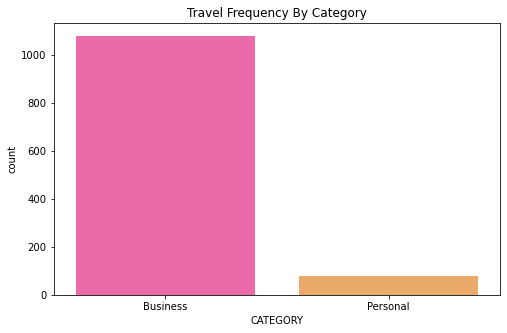

In [31]:
plt.figure(figsize=(8,5))
sns.countplot('CATEGORY',data=cabdata,palette='spring')
plt.title("Travel Frequency By Category");

As we can see from the plot that the number of travels due to Business reason are significantly more than the personal travel.

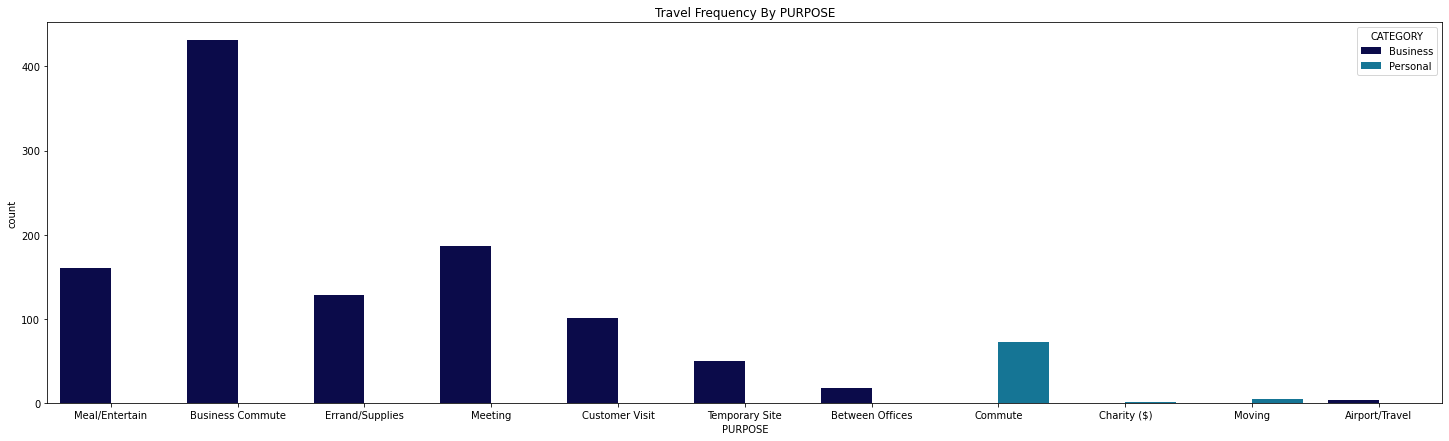

In [32]:
plt.figure(figsize=(25,7))
sns.countplot('PURPOSE',data=cabdata,palette='ocean', hue='CATEGORY')
plt.title("Travel Frequency By PURPOSE");

As we can see from the plot that the purpose of the travel under business category, which has high frequency other than the imputed class is Meeting, Meal/Entertain and Errand/Supplies and Customer Visit.
Under the personal category the purpose of the travel is not declared specifically other than the imputed class commute, all the other classes are having very less samples.
Airport/Travel under the business category has a very less frequency and Charity under personal category is less frequent.

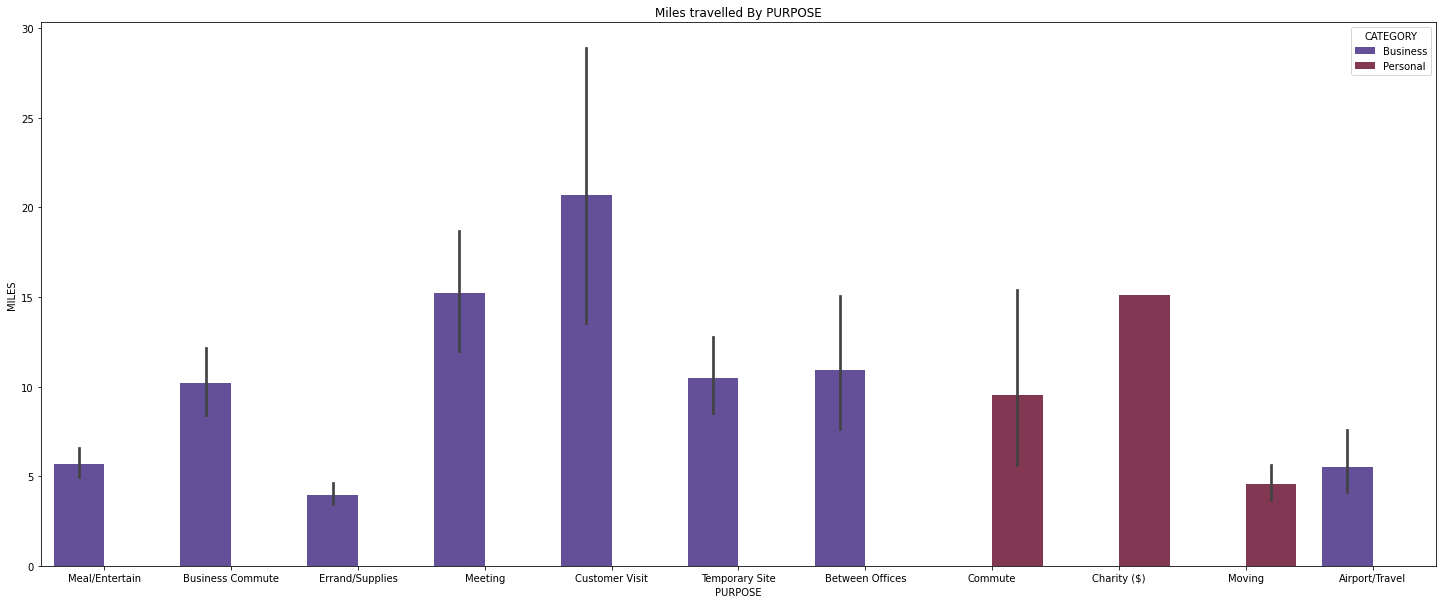

In [33]:
plt.figure(figsize=(25,10))
sns.barplot(y='MILES',x='PURPOSE',data=cabdata,palette='twilight',hue = 'CATEGORY')
plt.title("Miles travelled By PURPOSE");

As we can see from the plot the number of miles travelled by least travelled purpose like Charity and Airport/Travel have more number of miles. This shows that though the frequency of travel is high for some classes in purpose, the miles travelled is comparatively less than the other classes and similarly the classes with low frequency of travel has more number miles travelled than other high frequent classes.

In [34]:
# Creating a data where the start and stop location are same
Round_Trip = cabdata[cabdata['START']==cabdata['STOP']]
Round_Trip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 1152
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  288 non-null    datetime64[ns]
 1   END_DATE    288 non-null    datetime64[ns]
 2   CATEGORY    288 non-null    object        
 3   START       288 non-null    object        
 4   STOP        288 non-null    object        
 5   MILES       288 non-null    float64       
 6   PURPOSE     288 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 18.0+ KB


In [35]:
Round_Trip.PURPOSE.value_counts()

Business Commute    126
Errand/Supplies      51
Meeting              31
Meal/Entertain       28
Commute              22
Customer Visit       14
Temporary Site       11
Airport/Travel        3
Between Offices       2
Name: PURPOSE, dtype: int64

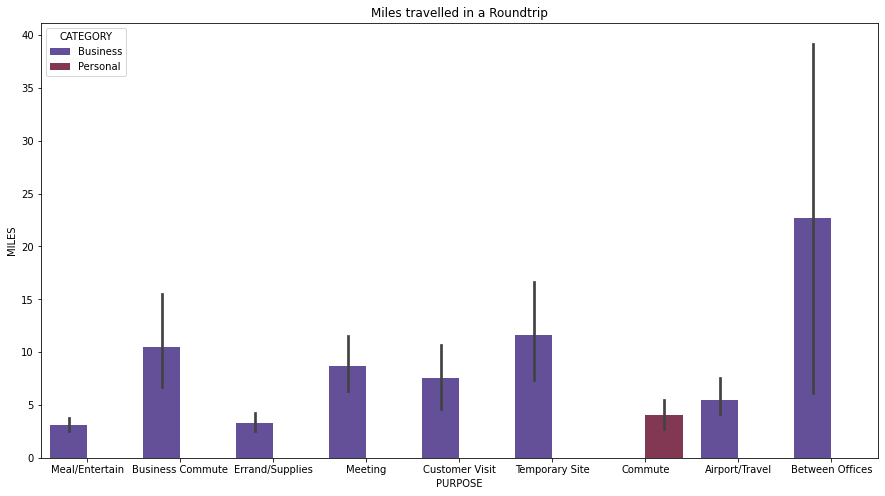

In [36]:
plt.figure(figsize=(15,8))
sns.barplot(y='MILES',x='PURPOSE',data=Round_Trip,palette='twilight',hue = 'CATEGORY')
plt.title("Miles travelled in a Roundtrip");

The travel purposes which has the most roundtrip is "Between Offices". And some purposes like "charity, Moving" are not having any roundtrips. From this we can understand that more number of Roundtrips are taken due to Business reasons.

In [37]:
import datetime
Month_Travel = []
for i in range(len(cabdata)):
    Month_Travel.append(cabdata['END_DATE'][i].strftime("%m"))

In [38]:
Travel_Month = pd.DataFrame(Month_Travel)
Travel_Month.head()

,0
0,01
1,01
2,01
3,01
4,01


In [39]:
cabdata['Travel_Month'] = Travel_Month

In [40]:
cabdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   START_DATE    1155 non-null   datetime64[ns]
 1   END_DATE      1155 non-null   datetime64[ns]
 2   CATEGORY      1155 non-null   object        
 3   START         1155 non-null   object        
 4   STOP          1155 non-null   object        
 5   MILES         1155 non-null   float64       
 6   PURPOSE       1155 non-null   object        
 7   Travel_Month  1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 72.3+ KB


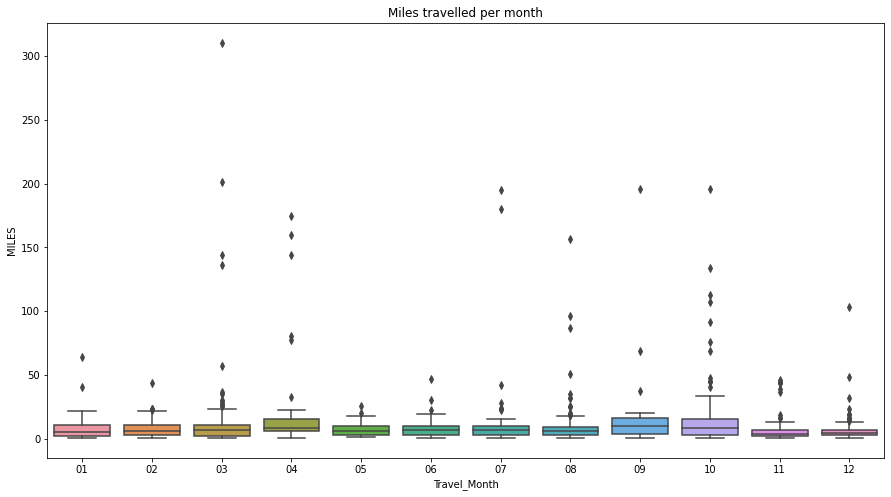

In [41]:
plt.figure(figsize=(15,8))
sns.boxplot(cabdata["Travel_Month"],cabdata["MILES"])
plt.title("Miles travelled per month");

The average miles travelled in each month are almost same which is around 10-20 miles. The maximum and minimum miles travelled across all the months are also in the same range. Maximum travelled miles is in the month "October" of around 40 miles. 
There are outliers present in each month where the very high outliers are in the month "March" and number of outliers are more in the month of october.
As per the plot we can see that there are no peak times of travel during any month, though some months have less miles travelled and some months have more miles travelled relatively but all are in the near range. 

To check for the trend and seasonality in the data lets construct the time seies plot. Creating a data with the start date as Date and Miles as the target variable.

In [42]:
TSdata = pd.DataFrame(cabdata['MILES'])
TSdata.head()

,MILES
0,5.1
1,5.0
2,4.8
3,4.7
4,63.7


In [43]:
from datetime import date
DATE = []
for i in range(len(cabdata)):
    DATE.append(cabdata['START_DATE'][i].date())

In [44]:
DATE = pd.DataFrame(DATE)
DATE.head()

,0
0,2016-01-01
1,2016-01-02
2,2016-01-02
3,2016-01-05
4,2016-01-06


In [45]:
TSdata['DATE'] = DATE
TSdata.head()

,MILES,DATE
0,5.1,2016-01-01
1,5.0,2016-01-02
2,4.8,2016-01-02
3,4.7,2016-01-05
4,63.7,2016-01-06


In [46]:
TSdata = TSdata.groupby("DATE")["MILES"].sum().reset_index()
TSdata.head()

,DATE,MILES
0,2016-01-01,5.1
1,2016-01-02,9.8
2,2016-01-05,4.7
3,2016-01-06,75.1
4,2016-01-07,0.8


In [47]:
TSdata["DATE"] = pd.to_datetime(TSdata["DATE"])
TSdata.set_index("DATE", inplace = True)

In [48]:
TSdata.head()

,MILES
DATE,
2016-01-01,5.1
2016-01-02,9.8
2016-01-05,4.7
2016-01-06,75.1
2016-01-07,0.8


Doing a timeseries resampling, week wise.

In [49]:
y = TSdata["MILES"].resample("W").mean()
y

DATE
2016-01-03      7.450000
2016-01-10     32.475000
2016-01-17     23.280000
2016-01-24     25.425000
2016-01-31     30.000000
2016-02-07     27.716667
2016-02-14     32.183333
2016-02-21     74.600000
2016-02-28     16.100000
2016-03-06     36.980000
2016-03-13     24.266667
2016-03-20     64.200000
2016-03-27    111.042857
2016-04-03    121.542857
2016-04-10     21.700000
2016-04-17     27.800000
2016-04-24     23.600000
2016-05-01     29.680000
2016-05-08     22.120000
2016-05-15     28.350000
2016-05-22     10.240000
2016-05-29     12.233333
2016-06-05     31.775000
2016-06-12     29.850000
2016-06-19     27.257143
2016-06-26     43.575000
2016-07-03     41.885714
2016-07-10     32.628571
2016-07-17    103.966667
2016-07-24     31.366667
2016-07-31     13.314286
2016-08-07     15.066667
2016-08-14     29.900000
2016-08-21     43.666667
2016-08-28    104.557143
2016-09-04     29.925000
2016-09-11     26.875000
2016-09-18      5.016667
2016-09-25     27.575000
2016-10-02     76.50

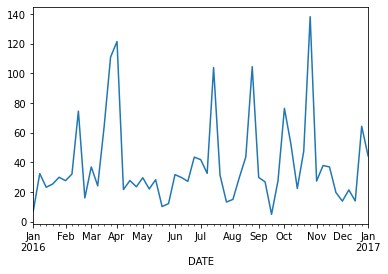

In [50]:
y.plot()
plt.show()

Thus there exist seasonality in the data but there is no trend pattern. 

Thus exploratory data analysis was done on the data where the data was inspected, cleaned, imputed and analysed. Which can further be used for Data transformation and model building.